<a href="https://colab.research.google.com/github/ilyx666/REVIEW/blob/trash/%D0%BA%D0%B0%D0%BA%D1%8D%D1%82%D0%BE%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

In [6]:
df = pd.read_excel("/content/review_preprocessing (1).xlsx")
df

,Unnamed: 0.1,Unnamed: 0,rewiew_ID,article,Date,Name,Rating,Rewiew,amount Photo
0,0,0,y1a2e4cBpT2rITcGXb5U,123837570,13-04-2023 17:42:42,Владимир,3,начинать подтупливать сенсор становиться работ...,0
1,1,1,uLDLeocB5g4sVs4D8-56,123837570,13-04-2023 13:26:39,Алексей,5,норма лопата камера слабый место придираться ч...,3
2,2,2,rWodeocBYE-HFOZ5m9-H,123837570,13-04-2023 10:16:13,Дилбар,5,хороший телефон пользоваться 4 месяц,2
3,3,3,H2r7eYcBYE-HFOZ529Vf,123837570,13-04-2023 09:39:22,Александр,5,NaN,0
4,4,4,PALIdocBl47NwnZ1Tx-R,123837570,12-04-2023 18:44:12,Елена,5,продавец супер доставка очень быстрый хороший ...,0
...,...,...,...,...,...,...,...,...,...
12587,12587,20567,ynKqwoMBXuaGXcNpj82i,110354345,06-10-2022 19:24:08,Екатерина,4,отлично спасибо,2
12588,12588,20587,Gt-leoMBI2nds0aGMKDT,110354345,22-09-2022 07:21:12,Екатерина,2,прекрасный часы работать,1
12589,12589,20592,_ip0ZYMBOCC9xHZPIgPO,110354345,20-09-2022 05:35:40,Анна,1,отличный качественный час,2
12590,12590,20593,lilXZYMBOCC9xHZPwPVd,110354345,19-09-2022 17:40:11,Алиса,2,самый хороший копия комплект очень долго выбир...,0


In [7]:
df = df.dropna()
# Получение списка отзывов
rev = df['Rewiew'].tolist()

# Обработка текста и создание списка наиболее часто встречаемых слов
words = []
for review in rev:
    words.extend(review.split()) # токенизация

word_count = Counter(words)
most_common_words = [word for word, count in word_count.most_common(5)] # Отбор 5 наиболее часто встречаемых слов

In [15]:
print(most_common_words)

['телефон', 'работать', 'приходить', 'очень', 'хороший']


In [16]:
import nltk
nltk.download('punkt')

wrdss = list(nltk.bigrams(word_count))

print(wrdss)

[('начинать', 'подтупливать'), ('подтупливать', 'сенсор'), ('сенсор', 'становиться'), ('становиться', 'работать'), ('работать', 'касание'), ('касание', 'норма'), ('норма', 'лопата'), ('лопата', 'камера'), ('камера', 'слабый'), ('слабый', 'место'), ('место', 'придираться'), ('придираться', 'чехол'), ('чехол', 'комплект'), ('комплект', 'пленка'), ('пленка', 'экран'), ('экран', 'зарядник'), ('зарядник', '33вт'), ('33вт', 'хороший'), ('хороший', 'телефон'), ('телефон', 'пользоваться'), ('пользоваться', '4'), ('4', 'месяц'), ('месяц', 'продавец'), ('продавец', 'супер'), ('супер', 'доставка'), ('доставка', 'очень'), ('очень', 'быстрый'), ('быстрый', 'аппарат'), ('аппарат', 'ребенок'), ('ребенок', 'довольный'), ('довольный', 'спасибо'), ('спасибо', 'рекомендовать'), ('рекомендовать', 'приходить'), ('приходить', 'целый'), ('целый', 'включаться'), ('включаться', 'заряжать'), ('заряжать', '54'), ('54', 'внешне'), ('внешне', 'нравиться'), ('нравиться', 'пока'), ('пока', 'проверять'), ('проверять'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


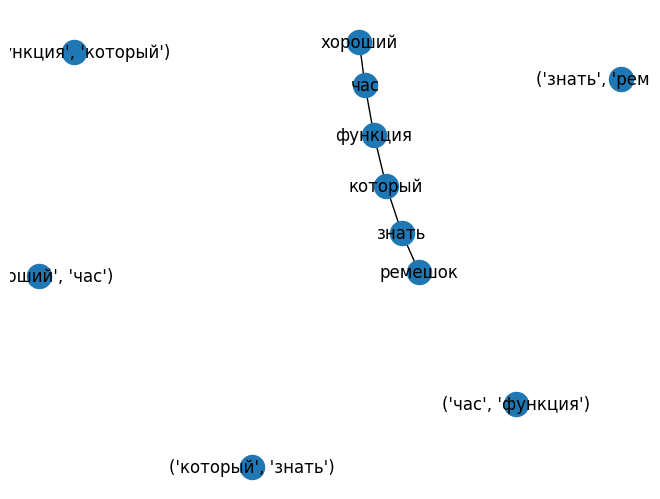

In [20]:
import nltk
nltk.download('punkt')
from nltk import bigrams

# Сбор биграмм для наиболее часто встречаемых слов
word_bigrams = []
for word in wrdss:
    word_tokens = [token for token in word_tokenize(review.lower()) if token.isalpha()]
    word_bigrams.extend(list(bigrams(word_tokens)))

# Подсчет количества повторений каждой биграммы
bigram_counter = Counter(word_bigrams)
most_common_bigrams = [bigram for bigram, _ in bigram_counter.most_common(5)]

# Построение графа биграмм
G = nx.Graph()

# Создание узлов для биграмм
G.add_nodes_from(most_common_bigrams)

# Добавление ребер между биграммами и соответствующими им словами
for bigram in most_common_bigrams:
    first_word, second_word = bigram
    if first_word in word_count and second_word in word_count:
        G.add_edge(first_word, second_word)

# Визуализация графа
nx.draw(G, with_labels=True)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119960 (\N{MATHEMATICAL BOLD ITALIC SMALL W}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119946 (\N{MATHEMATICAL BOLD ITALIC SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119951 (\N{MATHEMATICAL BOLD ITALIC SMALL N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning

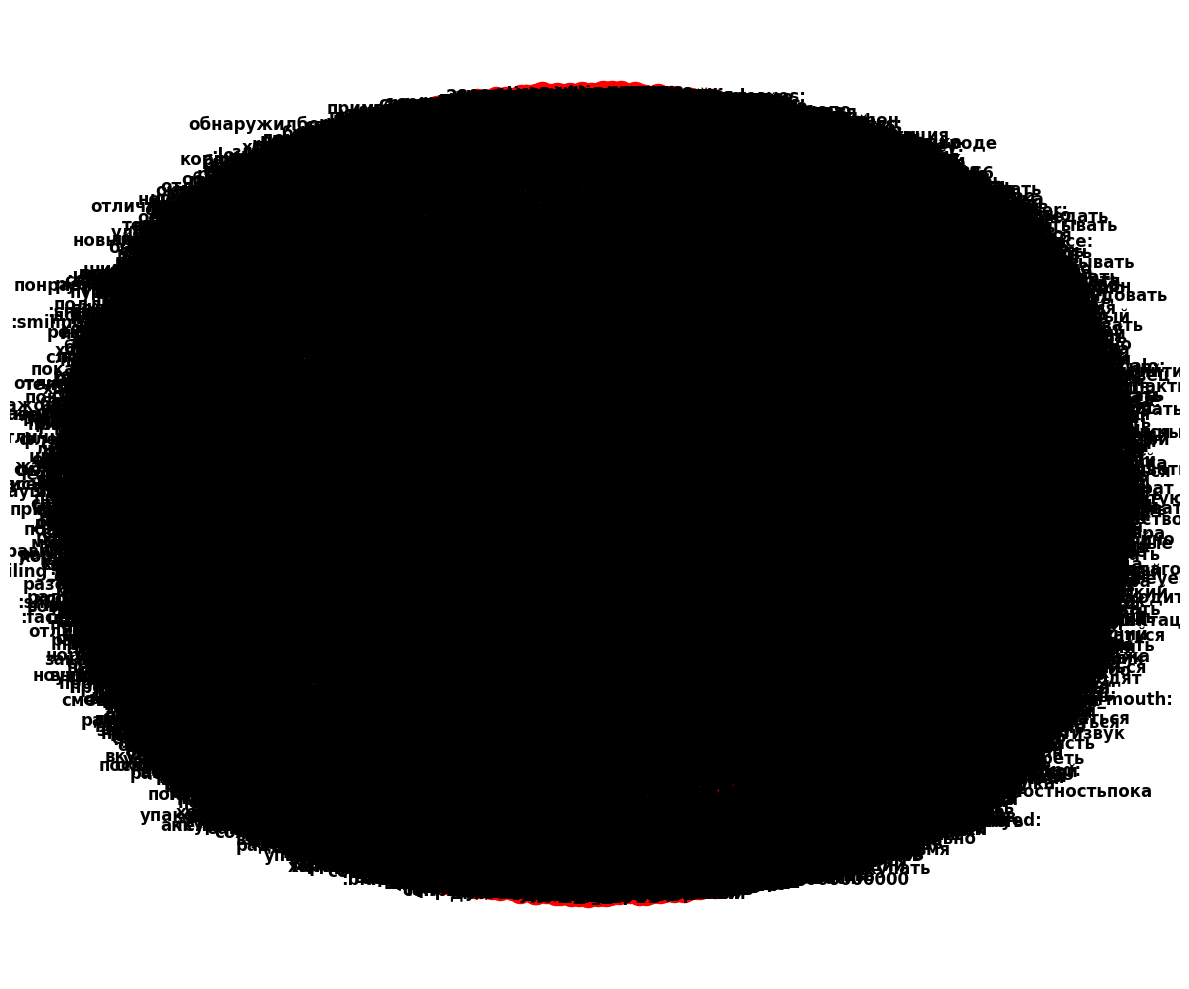

In [21]:
import nltk
nltk.download('punkt')

# Построение триграфа
Gg = nx.Graph()

# Создание узлов для слов
Gg.add_nodes_from(word_count, bipartite=0)

# Создание узлов для отзывов
reviews_nodes = []
for i, review in enumerate(rev):
    node_name = f"review_{i}"
    review_tokens = word_tokenize(review.lower())
    reviews_nodes.append(node_name)
    Gg.add_node(node_name, tokens=review_tokens, bipartite=1)

# Добавление ребер между словами и соответствующими им отзывами
for word in word_count:
    for node_name in reviews_nodes:
        review_tokens = Gg.nodes[node_name]['tokens']
        if word in review_tokens:
            Gg.add_edge(word, node_name)

# Раскладка графа и визуализация
pos = nx.spring_layout(Gg, k=0.2)
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(Gg, pos, node_color='blue', node_size=100, alpha=0.5)
nx.draw_networkx_nodes(Gg, pos, nodelist=reviews_nodes, node_color='red', node_size=300, alpha=1)
nx.draw_networkx_edges(Gg, pos, alpha=0.5)
nx.draw_networkx_labels(Gg, pos, font_size=12, font_weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()